# Dimensionality

Equipped with the appropriate tools and techniques, such as those packaged in seaborn, you are able to create data visualizations that support and inform a first level of analysis and discovery.

The limit is that most data visualization techniques are limited to representing and displaying one or two dimensions at a time, sometimes three or four but at the expense of readibility.

We will get a better intuition of what dimensionality reduction is by examining its application to a classic dataset : the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

This dataset is packaged in the [scikit-learn](https://scikit-learn.org/stable/) machine learning library.
The anaconda distribution includes scikit-learn, otherwise you can install it :
`conda install scikit-learn` .

## The Iris dataset
This data set describes irises, with 4 measurements (width and length of their petal and sepal) and the name of their species ([Setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor) or [Virginica](https://en.wikipedia.org/wiki/Iris_virginica)).

It is widely used to exemplify and test (supervised) machine learning algorithms for classification.

The most recent versions (>=0.23) of scikit-learn enable to load datasets as pandas DataFrame and operate transparently on them.
We will take advantage of that novelty, so make sure your version of scikit-learn is recent enough.

In [1]:
# load the iris dataset as a pandas DataFrame ("as_frame=True")
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

The [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) function returns a dictionary-like structure specific to scikit-learn, a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch), with a number of attributes.

### data
`iris.data` contains the *data matrix*, here as a DataFrame.

In [2]:
# TODO display this attribute


### target
`iris.target` contains the *classification target*, here as a pandas Series.

In [4]:
# TODO display this attribute


### feature_names
`iris.feature_names` contains the names of the columns of the dataset.

In [5]:
# TODO display this attribute


### target_names
`iris.target_names` contains the names of the target classes (classification targets).

In [6]:
# TODO display this attribute


Note that `target` is not a Series of strings or pandas `Categorical`, but a Series of integers.
`target_names` provides the ordered list of the names of the target classes, whose indices correspond to the integers in `target` :
- if `target` is 0 the iris is a `setosa`,
- if `target` is 1 the iris is a `versicolor`,
- if `target` is 2 the iris is a `virginica`.

In [7]:
# TODO display one of the labels by its index


This is because, under the hood, scikit-learn manipulates matrices and arrays of numbers.
Target classes, like categorical variables, are encoded by mapping their `n` values to consecutive integers ranging from `0` to `n-1`.

(In case you find the dtype of `target_names` weird : `<U10` corresponds in NumPy to an array type of Unicode characters of length 10, with byte-order little-endian, ie. strings of length 10 characters. Can you guess why 10 characters here ?)

### DESCR
`iris.DESCR` contains the full description of the dataset : The dataset embeds its own documentation.

In [8]:
# TODO display this attribute ; you probably want to use print()


This documentation includes summary statistics that are useful clues to exploit the data.

### filename
`iris.filename` stores the path to the location of the data.
This can be useful if you want to copy the dataset.

In [9]:
# TODO display this attribute


## Visual exploration of the dataset
To better understand the data, we will start by plotting data points with seaborn.
Representing target classes with colors enables to see their distribution and if there is a clear separation between classes on any dimension(s).

In [10]:
import seaborn as sns

### 1 dimensional plots
Draw a plot for each of the 4 dimensions in the data matrix, with target classes as colors.

In [11]:
# TODO draw plots


### 2 dimensional plots
Draw a plot for each pair of dimensions in the data matrix, with target classes as colors.

In [12]:
# TODO draw plots


### 3 dimensional plots
While seaborn enables concise specification of many plots, matplotlib still shines with its power and flexibility.
In this instance we will create 3d plots to visualize 3 dimensions at once.

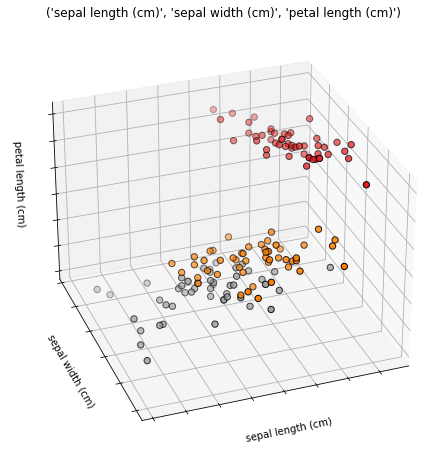

In [13]:
# source : https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the first 3 features (data columns 0, 1, 2)
fig = plt.figure(figsize=(8, 6))
# you can modify the parameters of Axes3D to change the angle
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data.iloc[:, 0], iris.data.iloc[:, 1], iris.data.iloc[:, 2], c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(str(tuple(iris.feature_names[:3])))
ax.set_xlabel(iris.feature_names[0])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[2])
ax.w_zaxis.set_ticklabels([])

plt.show()

You can even have interactive 3d visualization with Jupyterlab and matplotlib if you install the [jupyter-matplotlib extension](https://github.com/matplotlib/ipympl), see https://stackoverflow.com/a/56416229/14201886 .

You can adapt the code above to visualize different subsets of 3 dimensions among 4.

Can you see how one class could be separable from the other two?